In [15]:
# Data Preparation and Initial Setup

# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
df = pd.read_csv("bank/bank-full.csv", sep=";")  # Adjust the separator if necessary

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

# Display basic information about the dataset
print("\nDataset Information:")
print(df.info())

# Check for missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())

# Summary statistics of numeric columns
print("\nSummary Statistics:")
print(df.describe())

First 5 rows of the dataset:
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entr

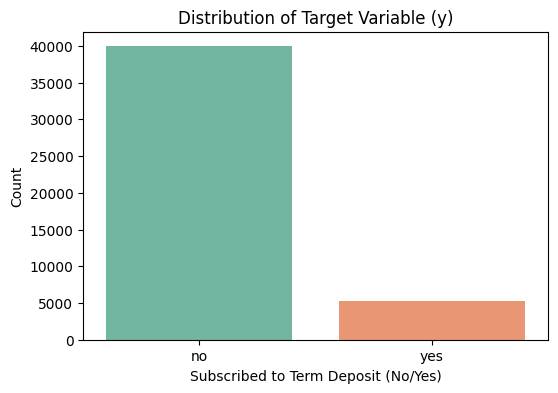

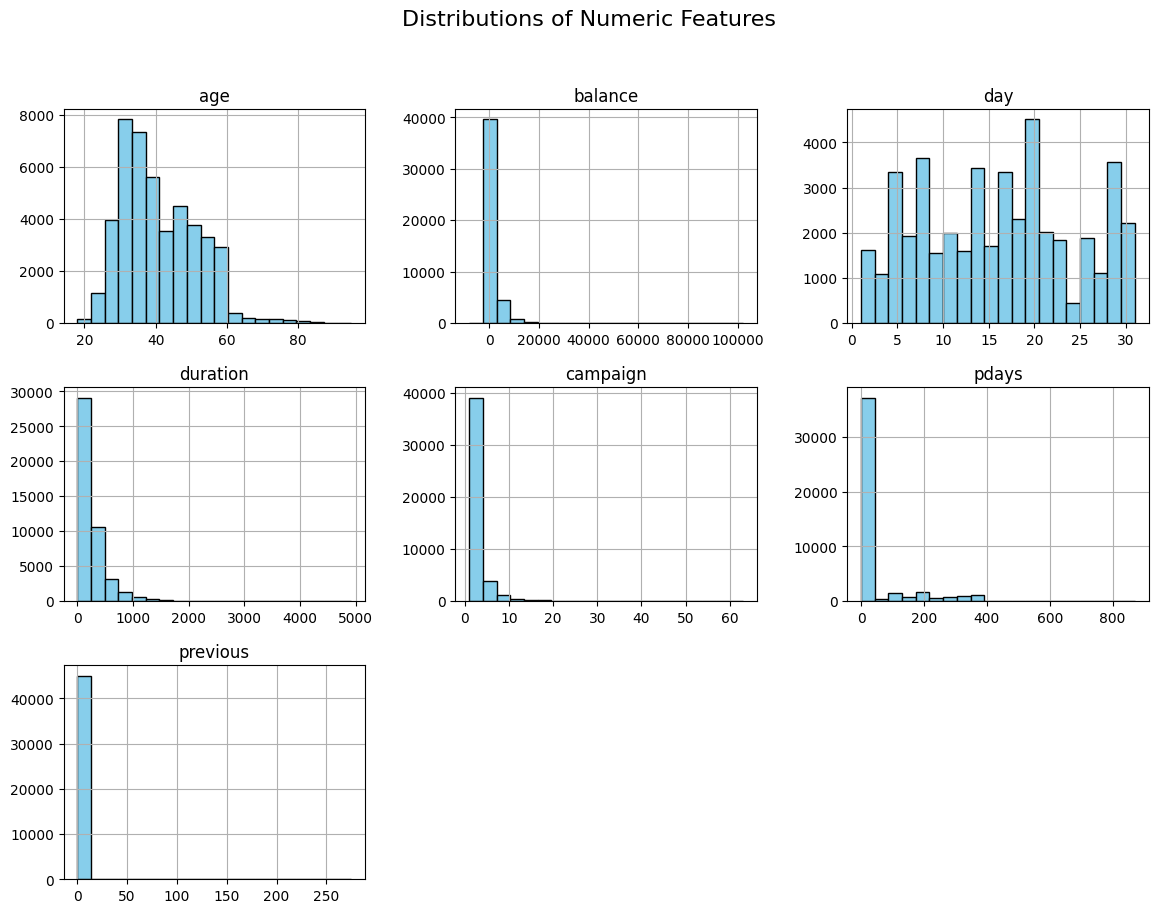

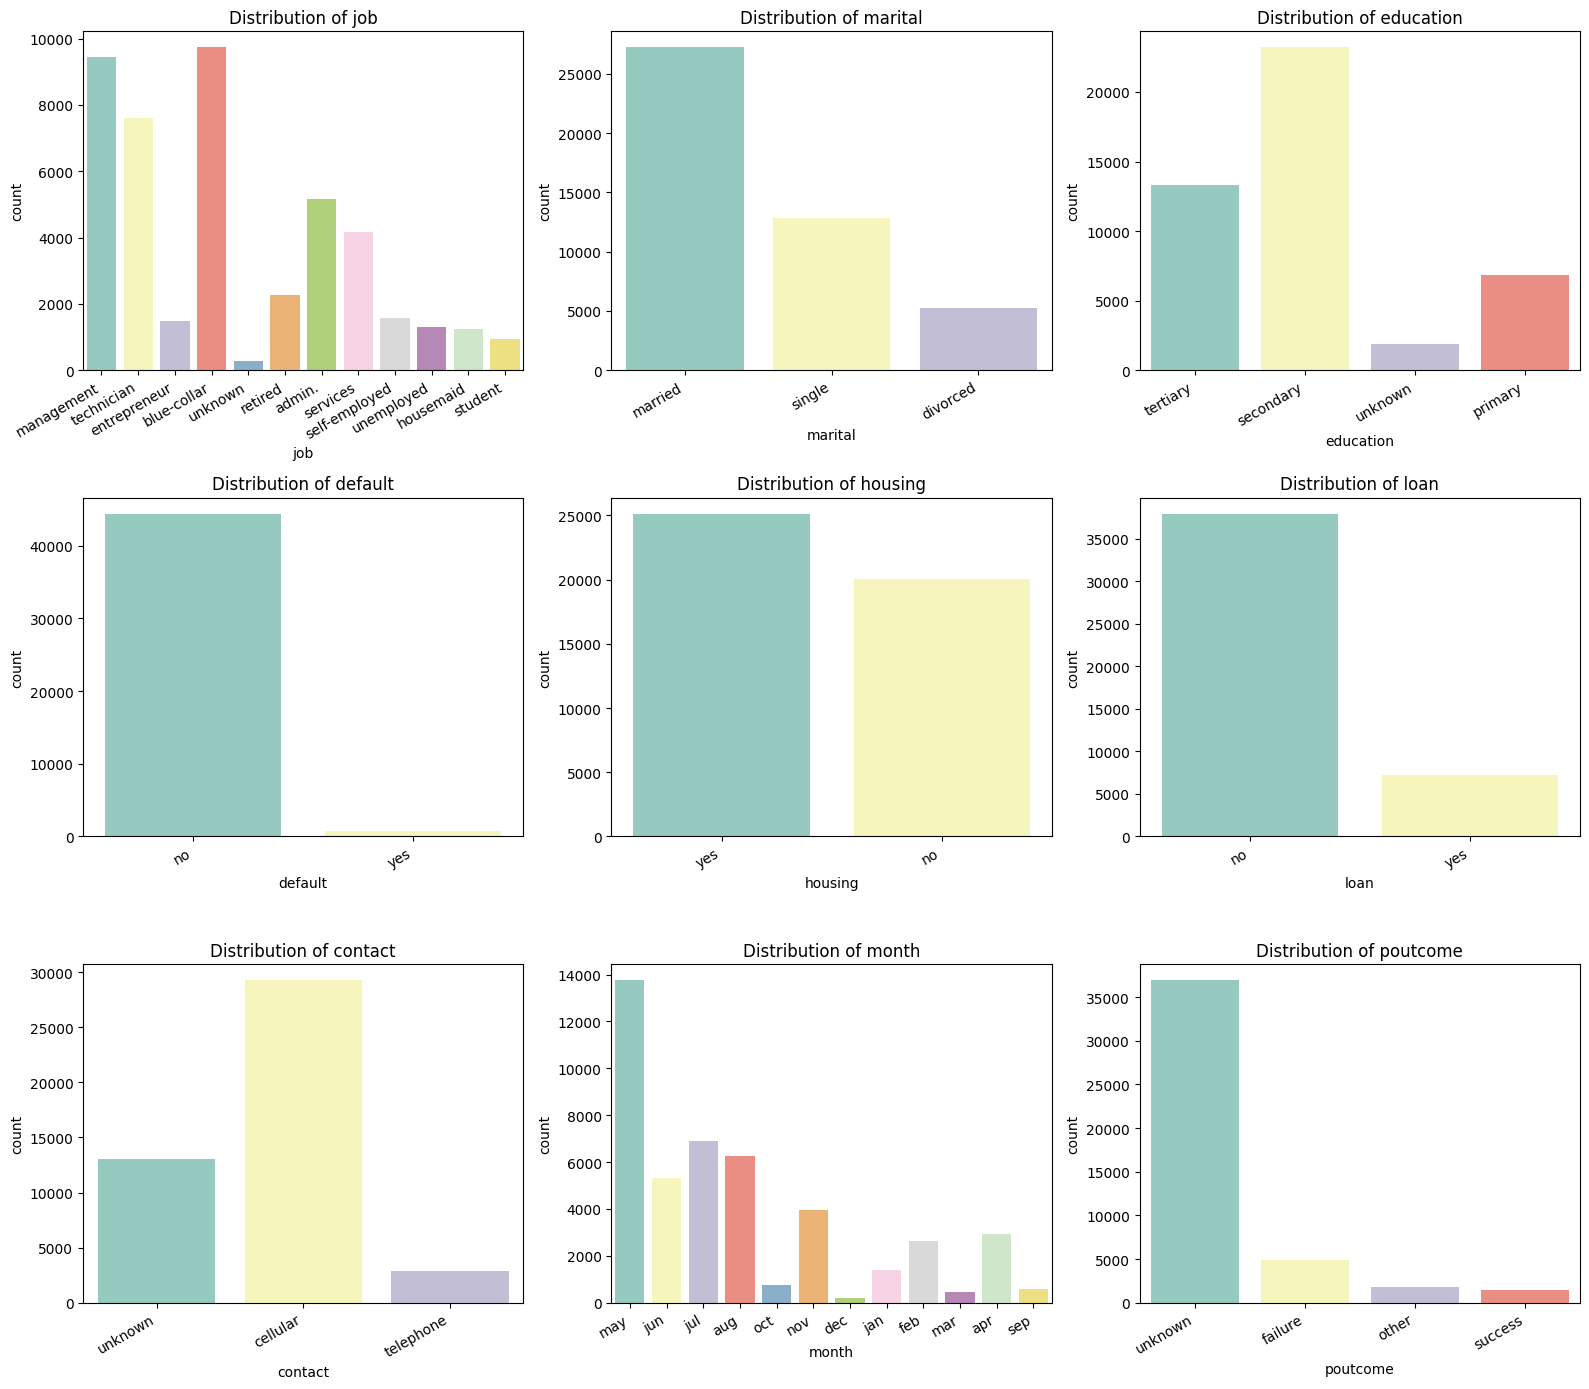

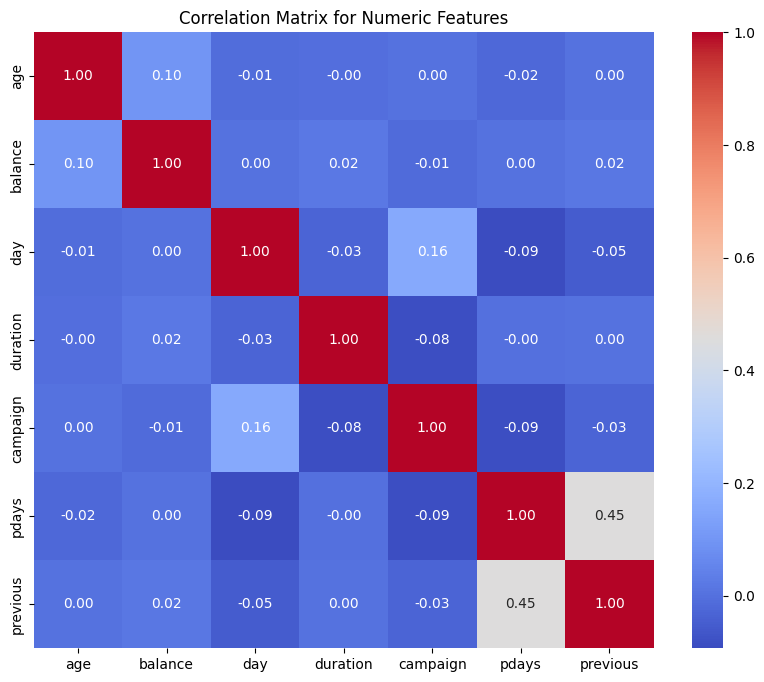

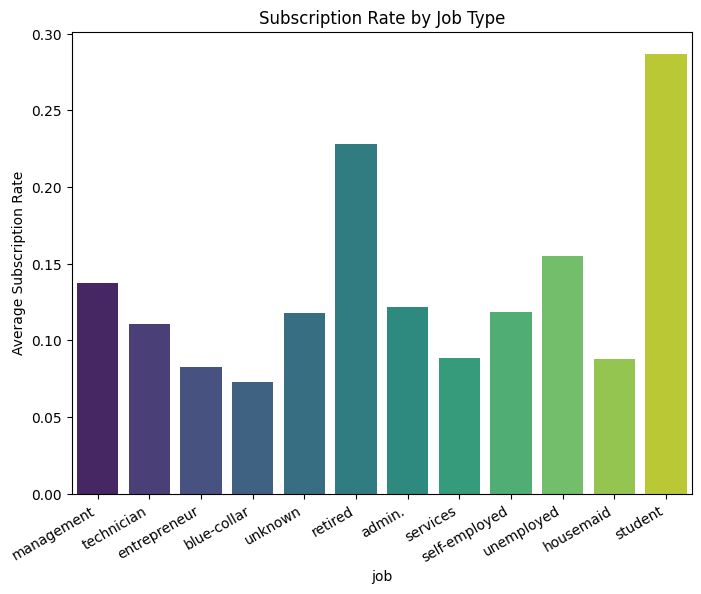

In [16]:
# Exploratory Data Analysis

# Distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='y', data=df, palette='Set2')
plt.title('Distribution of Target Variable (y)')
plt.xlabel('Subscribed to Term Deposit (No/Yes)')
plt.ylabel('Count')
plt.show()

# Explore numerical variables
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols].hist(bins=20, figsize=(14, 10), color='skyblue', edgecolor='black')
plt.suptitle('Distributions of Numeric Features', fontsize=16)
plt.show()

# Explore categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
plt.figure(figsize=(16, 14))
for i, col in enumerate(categorical_cols[:-1]):  # Exclude the target variable 'y'
    plt.subplot(3, 3, i + 1)
    sns.countplot(x=col, data=df, palette='Set3')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

# Correlation matrix for numeric columns
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Numeric Features')
plt.show()

# Explore the relationship between the target and other variables
# Relationship between job and subscription rate
plt.figure(figsize=(8, 6))
sns.barplot(
    x=df['job'], y=pd.get_dummies(df['y'])['yes'], estimator=np.mean, ci=None, palette='viridis'
)
plt.title('Subscription Rate by Job Type')
plt.ylabel('Average Subscription Rate')
plt.xticks(rotation=30, ha='right')
plt.show()

In [17]:
# Data Preprocessing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Define categorical and numeric columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('y')  # Exclude target variable
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Set up preprocessing pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ]
)

# Separate features (X) and target (y)
X = df.drop(columns=['y'])
y = df['y'].apply(lambda x: 1 if x == 'yes' else 0)  # Convert target to binary (0/1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Fit and transform the training data, transform the testing data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Output shapes to confirm preprocessing
print("\nShapes of Data:")
print("X_train_transformed:", X_train_transformed.shape)
print("X_test_transformed:", X_test_transformed.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


Missing Values:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Shapes of Data:
X_train_transformed: (36168, 42)
X_test_transformed: (9043, 42)
y_train: (36168,)
y_test: (9043,)


Training Logistic Regression...

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7985
           1       0.64      0.35      0.45      1058

    accuracy                           0.90      9043
   macro avg       0.78      0.66      0.70      9043
weighted avg       0.89      0.90      0.89      9043

Accuracy: 0.9012


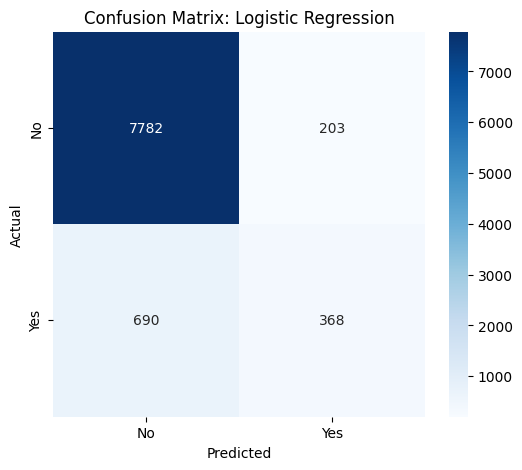

Training k-Nearest Neighbors...

k-Nearest Neighbors - Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7985
           1       0.60      0.34      0.43      1058

    accuracy                           0.90      9043
   macro avg       0.76      0.66      0.69      9043
weighted avg       0.88      0.90      0.88      9043

Accuracy: 0.8962


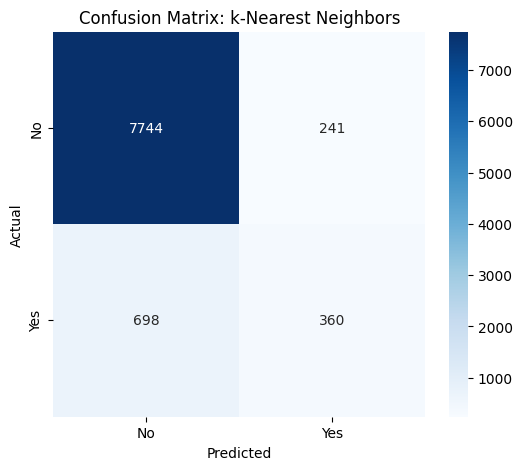

Training Decision Tree...

Decision Tree - Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7985
           1       0.46      0.48      0.47      1058

    accuracy                           0.87      9043
   macro avg       0.69      0.70      0.70      9043
weighted avg       0.88      0.87      0.87      9043

Accuracy: 0.8728


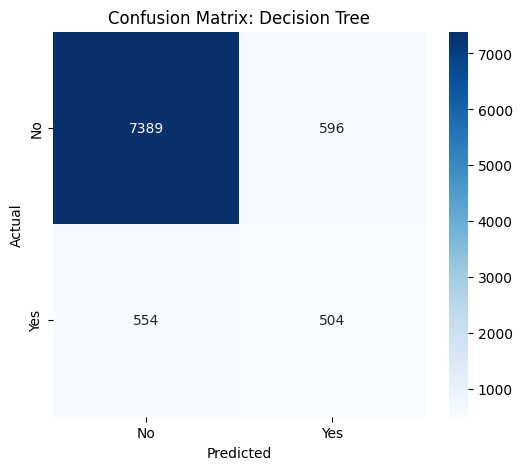

Training Support Vector Machine...

Support Vector Machine - Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7985
           1       0.65      0.19      0.29      1058

    accuracy                           0.89      9043
   macro avg       0.78      0.59      0.62      9043
weighted avg       0.87      0.89      0.87      9043

Accuracy: 0.8932


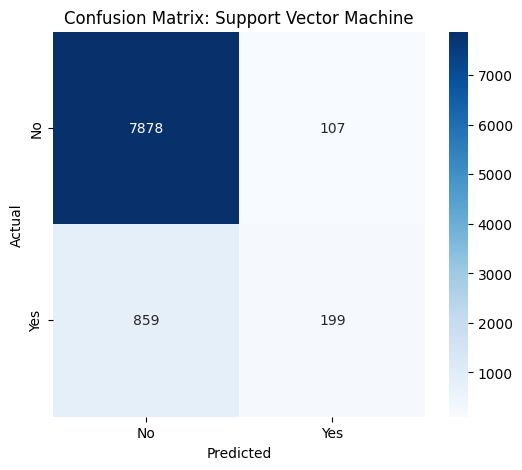

In [21]:
# Modeling with 4 classifiers
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline

# Define categorical and numeric columns
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
numeric_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Create a ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),  # Scale numeric features
        ('cat', OneHotEncoder(), categorical_cols)  # One-hot encode categorical features
    ]
)

# Define a helper function to train and evaluate models
def evaluate_model(model, model_name):
    # Create a pipeline combining preprocessing and the model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    # Train the model
    pipeline.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = pipeline.predict(X_test)
    
    # Evaluate the model
    print(f"Training {model_name}...\n")
    print(f"{model_name} - Classification Report:")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.title(f"Confusion Matrix: {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Logistic Regression
evaluate_model(LogisticRegression(random_state=42, max_iter=1000), "Logistic Regression")

# k-Nearest Neighbors (kNN)
evaluate_model(KNeighborsClassifier(n_neighbors=5), "k-Nearest Neighbors")

# Decision Tree Classifier
evaluate_model(DecisionTreeClassifier(random_state=42), "Decision Tree")

# Support Vector Machine (SVM)
evaluate_model(SVC(kernel='linear', random_state=42), "Support Vector Machine")

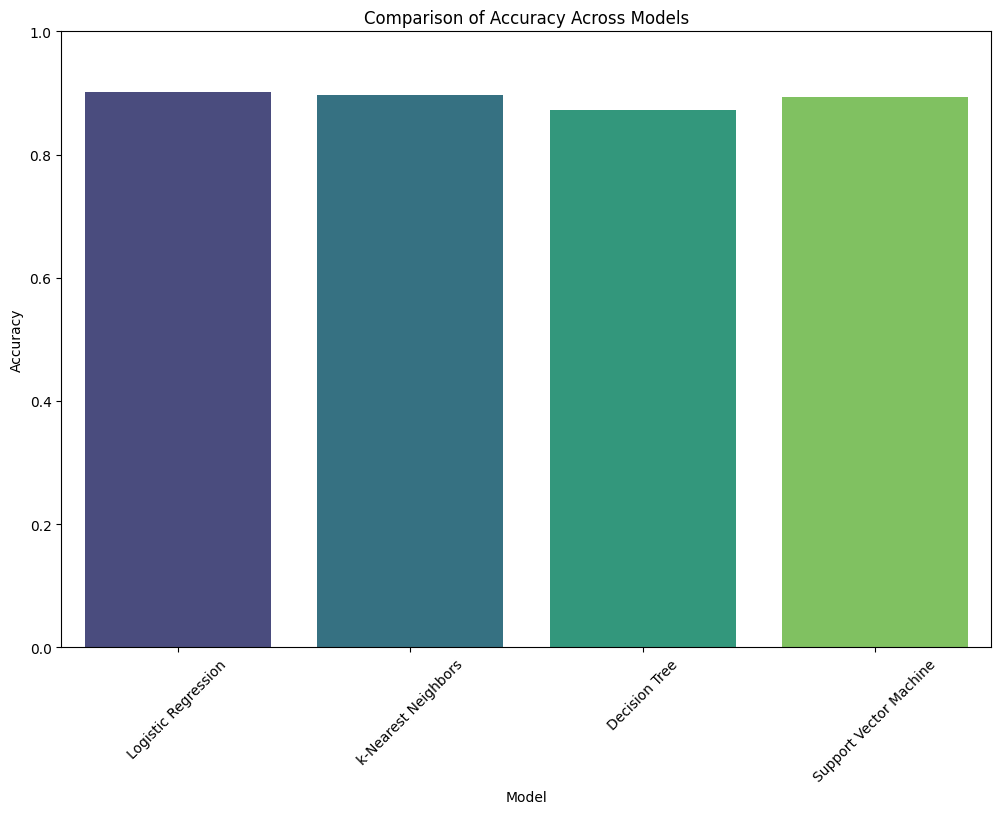

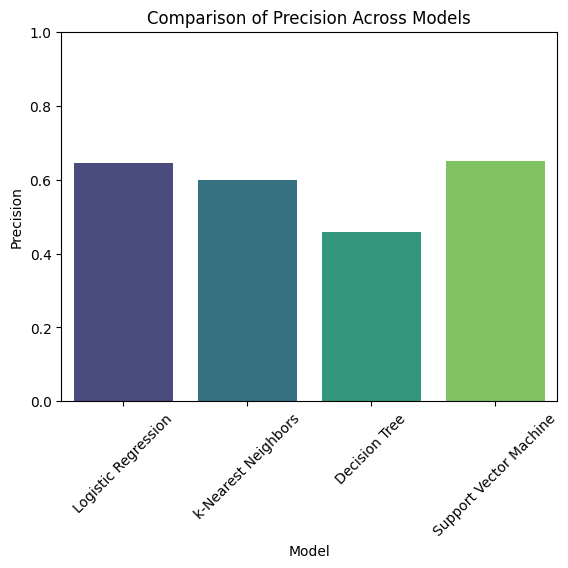

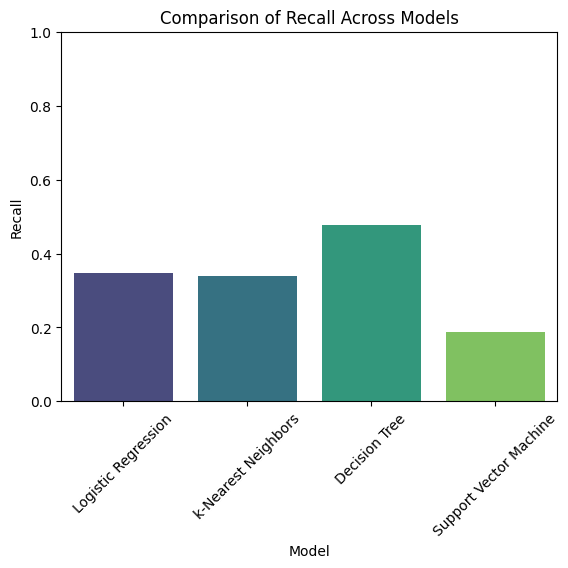

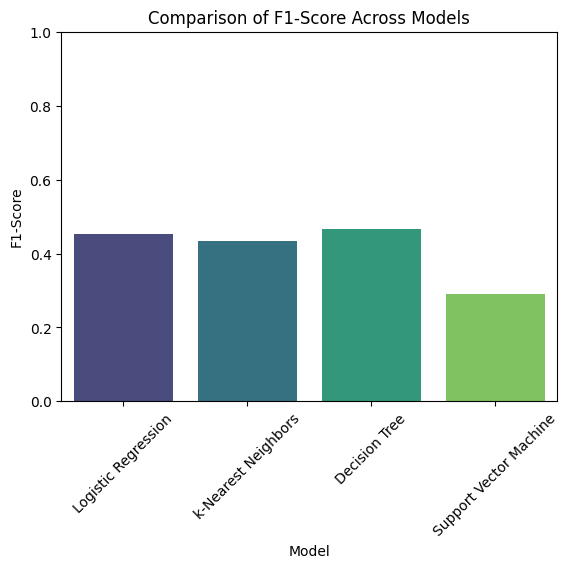

Model Comparison Results:
                    Model  Accuracy  Precision    Recall  F1-Score
0     Logistic Regression  0.901250   0.644483  0.347826  0.451811
1     k-Nearest Neighbors  0.896163   0.599002  0.340265  0.433996
2           Decision Tree  0.872830   0.458182  0.476371  0.467099
3  Support Vector Machine  0.893177   0.650327  0.188091  0.291789


In [24]:
# Compare Results Across Models
from sklearn.metrics import precision_score, recall_score, f1_score

# Define a dictionary to store results for all classifiers
model_results = {}

# Helper function to store model performance metrics
def store_results(model_name, y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=1)  # 1 corresponds to 'yes'
    recall = recall_score(y_test, y_pred, pos_label=1)  # 1 corresponds to 'yes'
    f1 = f1_score(y_test, y_pred, pos_label=1)  # 1 corresponds to 'yes'
    
    model_results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    }

# Evaluate Logistic Regression
logistic_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])
logistic_pipeline.fit(X_train, y_train)
logistic_pred = logistic_pipeline.predict(X_test)
store_results("Logistic Regression", y_test, logistic_pred)

# Evaluate k-Nearest Neighbors (kNN)
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5))
])
knn_pipeline.fit(X_train, y_train)
knn_pred = knn_pipeline.predict(X_test)
store_results("k-Nearest Neighbors", y_test, knn_pred)

# Evaluate Decision Tree
decision_tree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])
decision_tree_pipeline.fit(X_train, y_train)
decision_tree_pred = decision_tree_pipeline.predict(X_test)
store_results("Decision Tree", y_test, decision_tree_pred)

# Evaluate Support Vector Machine (SVM)
svm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel='linear', random_state=42))
])
svm_pipeline.fit(X_train, y_train)
svm_pred = svm_pipeline.predict(X_test)
store_results("Support Vector Machine", y_test, svm_pred)

# Convert results into a DataFrame for visualization
results_df = pd.DataFrame(model_results).T
results_df = results_df.reset_index().rename(columns={"index": "Model"})

# Step 5.2: Visualizing Model Performance
plt.figure(figsize=(12, 8))
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
for metric in metrics:
    sns.barplot(x="Model", y=metric, data=results_df, palette="viridis")
    plt.title(f"Comparison of {metric} Across Models")
    plt.ylabel(metric)
    plt.xlabel("Model")
    plt.ylim(0, 1)
    plt.xticks(rotation=45)
    plt.show()

# Display the results DataFrame
print("Model Comparison Results:")
print(results_df)

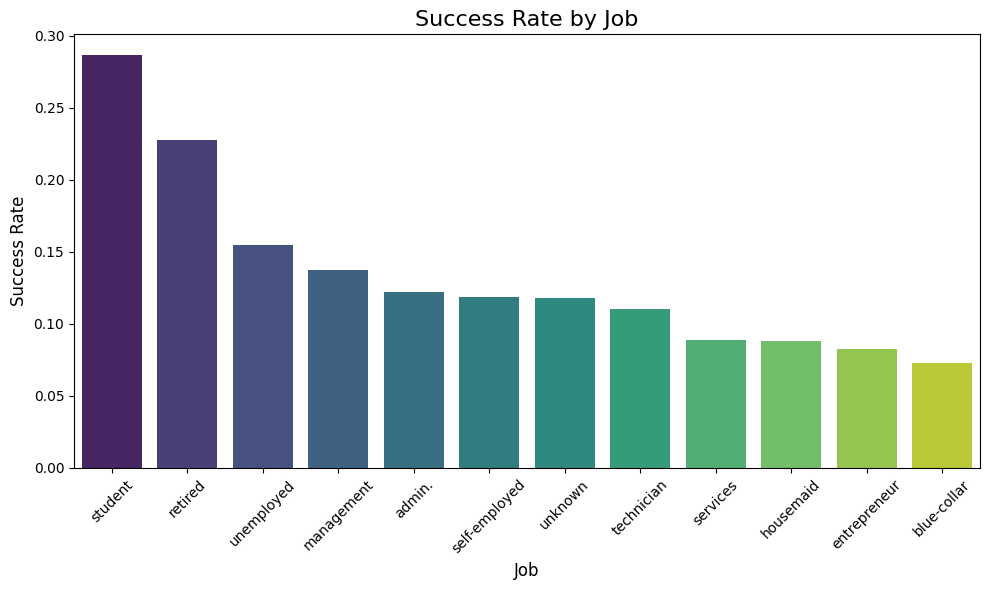

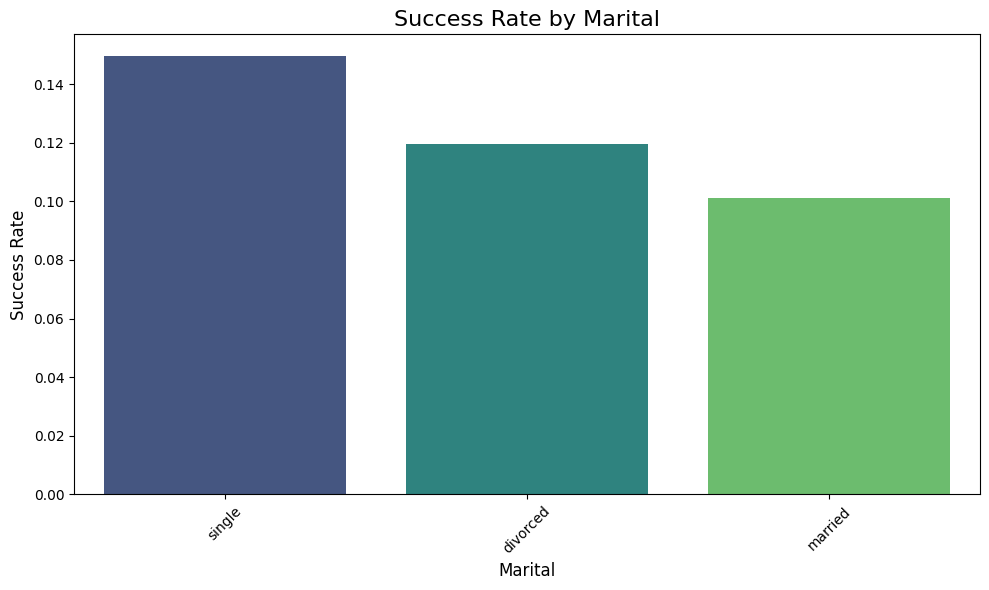

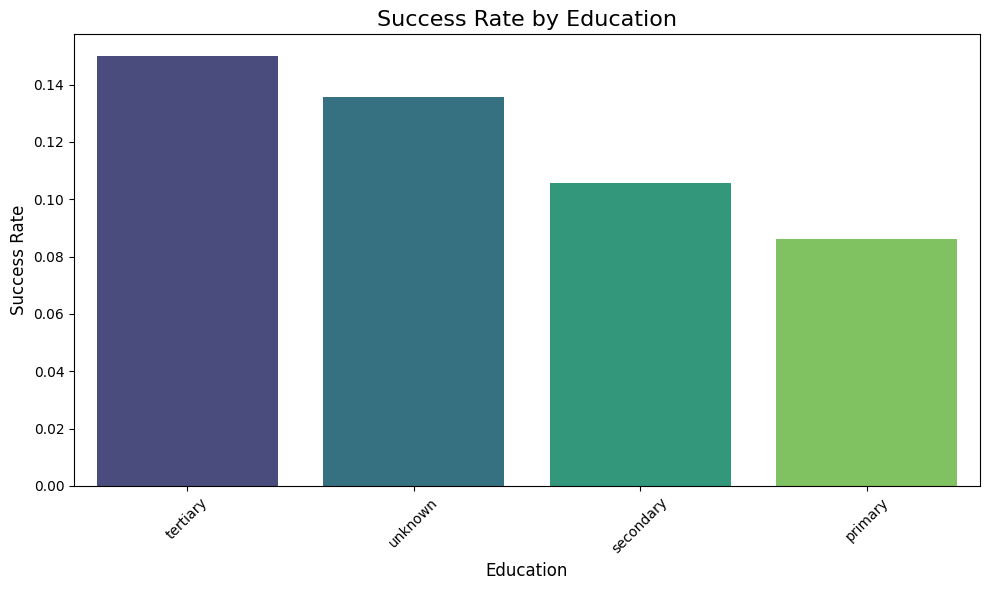

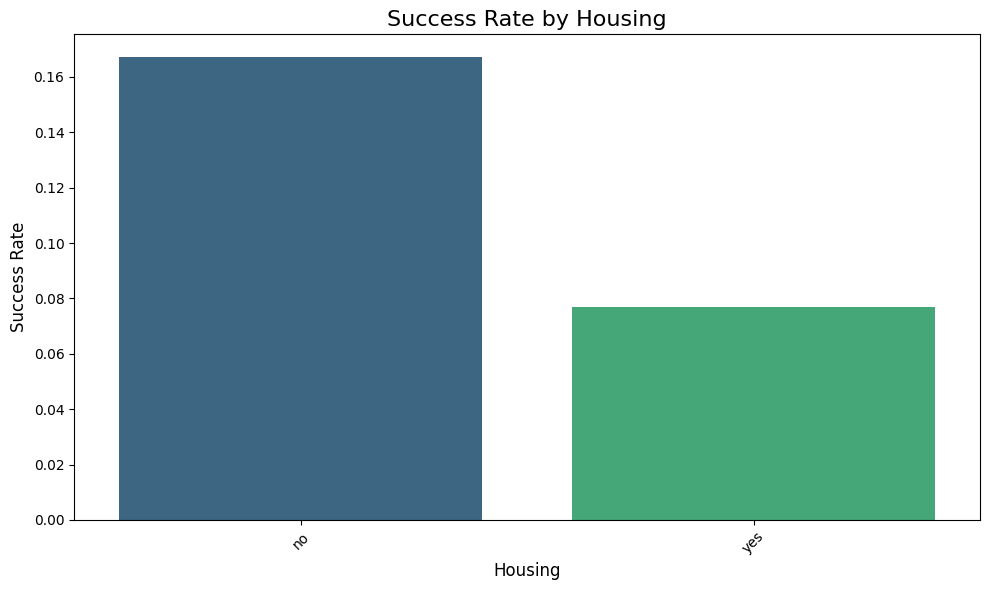

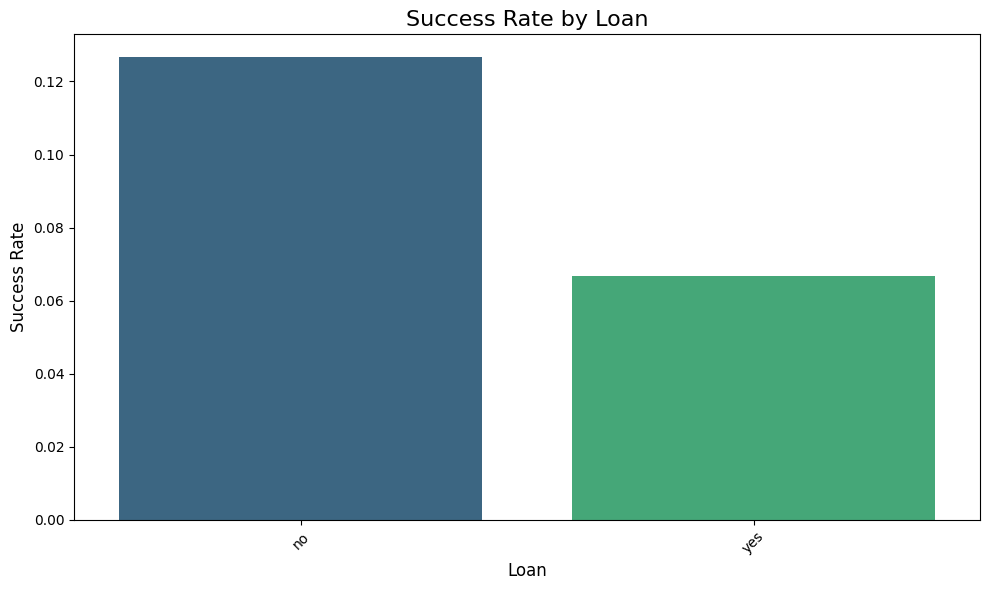

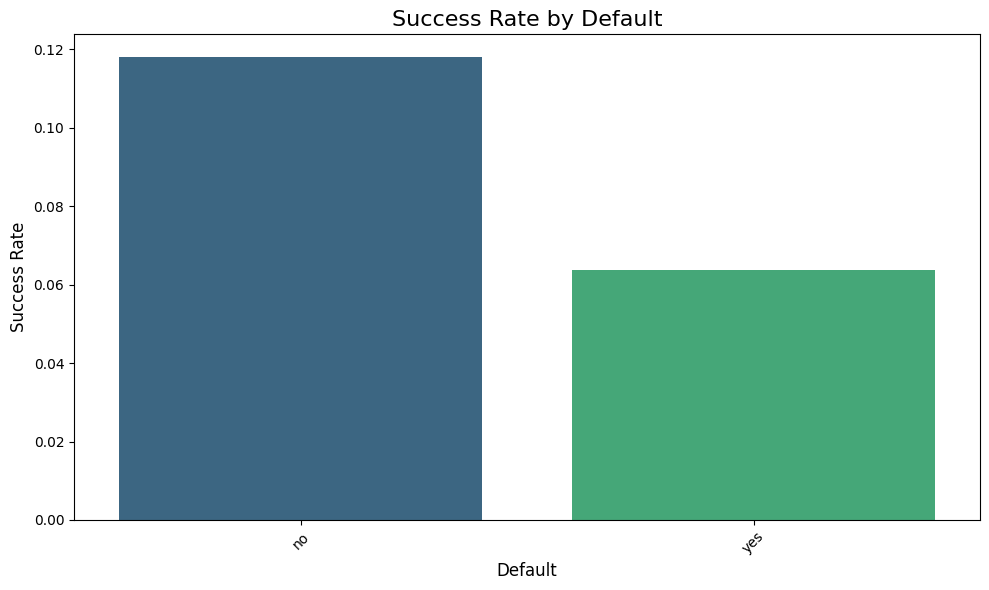

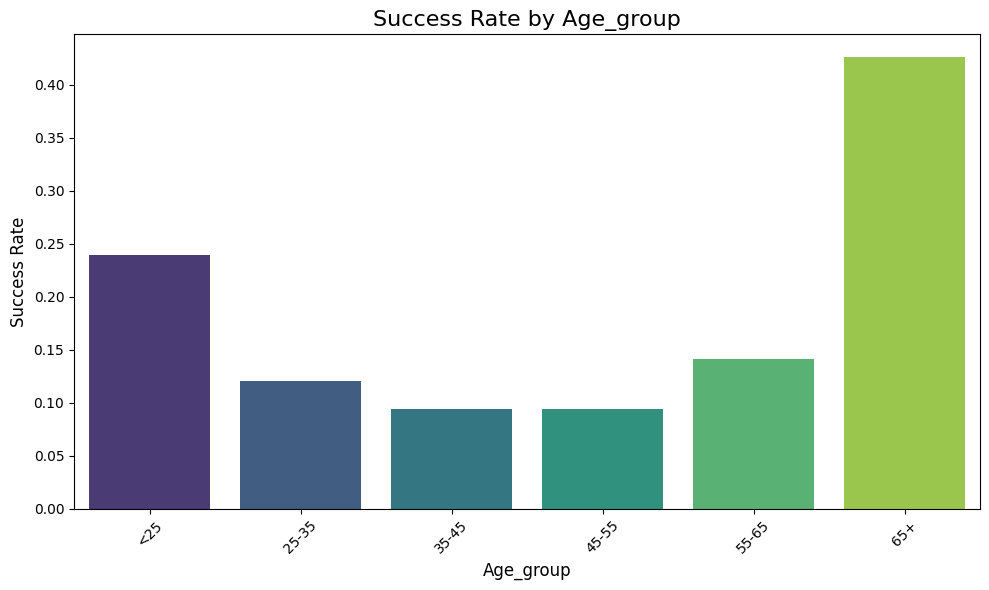

Top Recommendations for Target Demographics:
- Target job: 'student' with a success rate of 28.68%
- Target marital: 'single' with a success rate of 14.95%
- Target education: 'tertiary' with a success rate of 15.01%
- Target housing: 'no' with a success rate of 16.70%
- Target loan: 'no' with a success rate of 12.66%
- Target default: 'no' with a success rate of 11.80%
- Target age_group: '65+' with a success rate of 42.61%


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Encode the target column 'y' to numeric
data['y'] = data['y'].map({'yes': 1, 'no': 0})  # Convert 'yes'/'no' to 1/0

# Step 2: Define a function to calculate success rates
def calculate_success_rate(data, column):
    success_rate = data.groupby(column)['y'].mean().sort_values(ascending=False)
    return success_rate

# List of demographic features to analyze
demographic_features = ['job', 'marital', 'education', 'housing', 'loan', 'default', 'age']

# Store success rates for each demographic feature
success_rates = {}
for feature in demographic_features:
    if feature == 'age':
        # Create age groups
        data['age_group'] = pd.cut(data['age'], bins=[0, 25, 35, 45, 55, 65, 100],
                                   labels=['<25', '25-35', '35-45', '45-55', '55-65', '65+'])
        success_rates['age_group'] = calculate_success_rate(data, 'age_group')
    else:
        success_rates[feature] = calculate_success_rate(data, feature)

# Step 3: Visualize success rates for each demographic category
for feature, rates in success_rates.items():
    plt.figure(figsize=(10, 6))
    sns.barplot(x=rates.index, y=rates.values, palette="viridis")
    plt.title(f"Success Rate by {feature.capitalize()}", fontsize=16)
    plt.xlabel(feature.capitalize(), fontsize=12)
    plt.ylabel("Success Rate", fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Step 4: Recommendations based on success rates
print("Top Recommendations for Target Demographics:")
for feature, rates in success_rates.items():
    top_category = rates.idxmax()
    top_rate = rates.max()
    print(f"- Target {feature}: '{top_category}' with a success rate of {top_rate:.2%}")